In [77]:
import torch
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [28]:
X, y = make_classification(n_samples = 10000, n_features = 2, n_classes = 2, n_redundant = 0, n_repeated = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

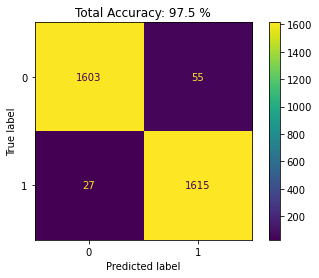

In [52]:
# estimate a logistic regression model 
base_LR = LogisticRegression(random_state = 42)
base_LR.fit(X_train, y_train)
pred = base_LR.predict(X_test)
acc = np.sum(pred == y_test) / y_test.shape[0]
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Total Accuracy: {100 * round(acc,3)} %')
plt.show()

(-4.0, 4.0)

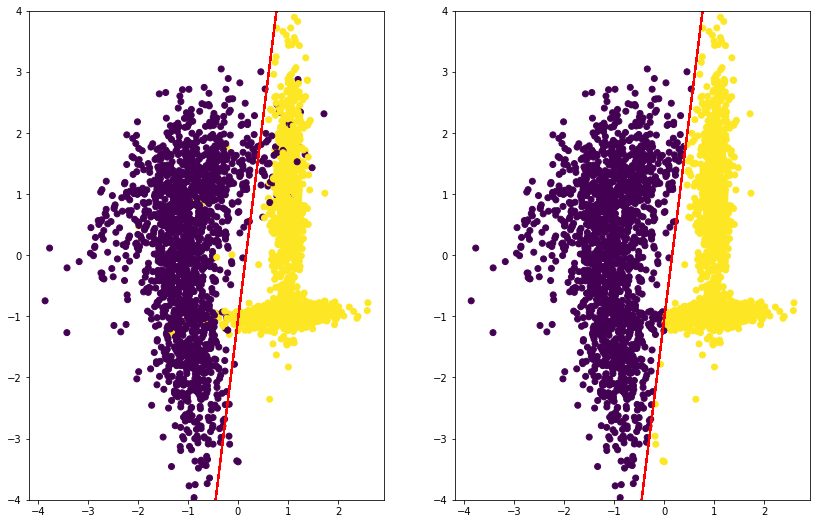

In [67]:
decision_boundary = base_LR.intercept_- base_LR.coef_[0][0] / base_LR.coef_[0][1] * X_test[:,0]

fig = plt.figure(figsize =(14, 9))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(X_test[:,0], X_test[:,1], c = y_test)
ax2.scatter(X_test[:,0], X_test[:,1], c = pred)
ax1.plot(X_test[:,0],decision_boundary, c = 'red')
ax2.plot(X_test[:,0],decision_boundary, c = 'red')
ax1.set_ylim(-4, 4)
ax2.set_ylim(-4, 4)

In [108]:
## define logistic regression as per https://towardsdatascience.com/logistic-regression-with-pytorch-3c8bbea594be
class NNLogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NNLogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

class smallNN(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(smallNN, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 2)
        self.linear2 = torch.nn.Linear(2,2)
        self.linear3 = torch.nn.Linear(2, output_dim)

    def forward(self, x):
        pass1 = self.linear(x)
        pass2 = self.linear2(pass1)
        pass3 = self.linear3(pass2)
        outputs = torch.sigmoid(pass3)
        return outputs

In [112]:
# setup for training
epochs = 50000
input_dim = 2
output_dim = 1
learning_rate = 0.001

# our model
NN_LR = smallNN(input_dim, output_dim)#NNLogisticRegression(input_dim, output_dim)

# additional reqs
criterion = torch.nn.BCELoss() # loss criterion
optimizer = torch.optim.SGD(NN_LR.parameters(), lr=learning_rate)

# convert data to torch tensors
X_train, X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train, y_test = torch.Tensor(y_train),torch.Tensor(y_test)

In [113]:
# copied from https://towardsdatascience.com/logistic-regression-with-pytorch-3c8bbea594be
losses = []
losses_test = []
Iterations = []
iter = 0
for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = NN_LR(X_train)
    loss = criterion(torch.squeeze(outputs), labels) 
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. the weights/bias
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    iter+=1
    if iter%1000==0:
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(NN_LR(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

Training Epochs:   2%|▏         | 1081/50000 [00:01<01:05, 752.13it/s]

Iteration: 1000. 
Test - Loss: 0.6906938552856445. Accuracy: 48.42424242424242
Train -  Loss: 0.6898691058158875. Accuracy: 49.134328358208954



Training Epochs:   4%|▍         | 2156/50000 [00:02<01:04, 738.26it/s]

Iteration: 2000. 
Test - Loss: 0.6625363826751709. Accuracy: 79.39393939393939
Train -  Loss: 0.6615048050880432. Accuracy: 80.14925373134328



Training Epochs:   6%|▌         | 3075/50000 [00:04<01:08, 687.85it/s]

Iteration: 3000. 
Test - Loss: 0.6041302680969238. Accuracy: 88.0909090909091
Train -  Loss: 0.6027387976646423. Accuracy: 88.14925373134328



Training Epochs:   8%|▊         | 4143/50000 [00:05<00:59, 772.51it/s]

Iteration: 4000. 
Test - Loss: 0.48127877712249756. Accuracy: 92.54545454545455
Train -  Loss: 0.4799499213695526. Accuracy: 92.65671641791045



Training Epochs:  10%|█         | 5104/50000 [00:07<01:11, 628.65it/s]

Iteration: 5000. 
Test - Loss: 0.32036635279655457. Accuracy: 95.36363636363636
Train -  Loss: 0.3203982710838318. Accuracy: 94.77611940298507



Training Epochs:  12%|█▏        | 6107/50000 [00:09<01:03, 686.18it/s]

Iteration: 6000. 
Test - Loss: 0.2131521850824356. Accuracy: 96.21212121212122
Train -  Loss: 0.21487325429916382. Accuracy: 95.92537313432835



Training Epochs:  14%|█▍        | 7072/50000 [00:10<01:04, 660.68it/s]

Iteration: 7000. 
Test - Loss: 0.16133838891983032. Accuracy: 96.48484848484848
Train -  Loss: 0.16395951807498932. Accuracy: 96.2089552238806



Training Epochs:  16%|█▌        | 8107/50000 [00:12<01:01, 680.03it/s]

Iteration: 8000. 
Test - Loss: 0.13578903675079346. Accuracy: 96.81818181818181
Train -  Loss: 0.13872309029102325. Accuracy: 96.53731343283582



Training Epochs:  18%|█▊        | 9116/50000 [00:13<00:57, 708.33it/s]

Iteration: 9000. 
Test - Loss: 0.12190213054418564. Accuracy: 96.96969696969697
Train -  Loss: 0.12487876415252686. Accuracy: 96.7910447761194



Training Epochs:  20%|██        | 10060/50000 [00:14<00:58, 683.32it/s]

Iteration: 10000. 
Test - Loss: 0.11367955803871155. Accuracy: 97.18181818181819
Train -  Loss: 0.11659198254346848. Accuracy: 96.95522388059702



Training Epochs:  22%|██▏       | 11079/50000 [00:16<00:58, 670.88it/s]

Iteration: 11000. 
Test - Loss: 0.10848764330148697. Accuracy: 97.24242424242425
Train -  Loss: 0.11130021512508392. Accuracy: 97.08955223880596



Training Epochs:  24%|██▍       | 12085/50000 [00:17<00:55, 688.19it/s]

Iteration: 12000. 
Test - Loss: 0.10505090653896332. Accuracy: 97.36363636363636
Train -  Loss: 0.10775740444660187. Accuracy: 97.14925373134328



Training Epochs:  26%|██▌       | 13096/50000 [00:19<00:52, 704.53it/s]

Iteration: 13000. 
Test - Loss: 0.102695032954216. Accuracy: 97.42424242424242
Train -  Loss: 0.1053006574511528. Accuracy: 97.25373134328358



Training Epochs:  28%|██▊       | 14091/50000 [00:20<00:53, 673.97it/s]

Iteration: 14000. 
Test - Loss: 0.10103707760572433. Accuracy: 97.45454545454545
Train -  Loss: 0.10355108976364136. Accuracy: 97.25373134328358



Training Epochs:  30%|███       | 15117/50000 [00:22<00:49, 704.63it/s]

Iteration: 15000. 
Test - Loss: 0.09984666109085083. Accuracy: 97.45454545454545
Train -  Loss: 0.10227897763252258. Accuracy: 97.26865671641791



Training Epochs:  32%|███▏      | 16086/50000 [00:23<00:46, 725.05it/s]

Iteration: 16000. 
Test - Loss: 0.09897849708795547. Accuracy: 97.45454545454545
Train -  Loss: 0.10133877396583557. Accuracy: 97.32835820895522



Training Epochs:  34%|███▍      | 17130/50000 [00:25<00:45, 718.36it/s]

Iteration: 17000. 
Test - Loss: 0.09833772480487823. Accuracy: 97.48484848484848
Train -  Loss: 0.10063471645116806. Accuracy: 97.32835820895522



Training Epochs:  36%|███▌      | 18082/50000 [00:26<00:49, 638.42it/s]

Iteration: 18000. 
Test - Loss: 0.09786039590835571. Accuracy: 97.51515151515152
Train -  Loss: 0.10010170191526413. Accuracy: 97.29850746268657



Training Epochs:  38%|███▊      | 19128/50000 [00:28<00:45, 677.53it/s]

Iteration: 19000. 
Test - Loss: 0.09750216454267502. Accuracy: 97.54545454545455
Train -  Loss: 0.0996946394443512. Accuracy: 97.31343283582089



Training Epochs:  40%|████      | 20066/50000 [00:29<00:43, 696.08it/s]

Iteration: 20000. 
Test - Loss: 0.0972319170832634. Accuracy: 97.54545454545455
Train -  Loss: 0.09938131272792816. Accuracy: 97.32835820895522



Training Epochs:  42%|████▏     | 21131/50000 [00:31<00:44, 654.87it/s]

Iteration: 21000. 
Test - Loss: 0.0970272421836853. Accuracy: 97.54545454545455
Train -  Loss: 0.0991387665271759. Accuracy: 97.31343283582089



Training Epochs:  44%|████▍     | 22067/50000 [00:33<00:42, 659.06it/s]

Iteration: 22000. 
Test - Loss: 0.09687191247940063. Accuracy: 97.54545454545455
Train -  Loss: 0.09895001351833344. Accuracy: 97.32835820895522



Training Epochs:  46%|████▌     | 23102/50000 [00:34<00:42, 634.25it/s]

Iteration: 23000. 
Test - Loss: 0.09675372391939163. Accuracy: 97.54545454545455
Train -  Loss: 0.09880228340625763. Accuracy: 97.34328358208955



Training Epochs:  48%|████▊     | 24151/50000 [00:36<00:35, 737.76it/s]

Iteration: 24000. 
Test - Loss: 0.09666401892900467. Accuracy: 97.54545454545455
Train -  Loss: 0.09868641197681427. Accuracy: 97.34328358208955



Training Epochs:  50%|█████     | 25092/50000 [00:37<00:37, 665.67it/s]

Iteration: 25000. 
Test - Loss: 0.09659584611654282. Accuracy: 97.54545454545455
Train -  Loss: 0.09859505295753479. Accuracy: 97.34328358208955



Training Epochs:  52%|█████▏    | 26099/50000 [00:38<00:34, 684.21it/s]

Iteration: 26000. 
Test - Loss: 0.09654436260461807. Accuracy: 97.54545454545455
Train -  Loss: 0.09852277487516403. Accuracy: 97.34328358208955



Training Epochs:  54%|█████▍    | 27076/50000 [00:40<00:32, 703.54it/s]

Iteration: 27000. 
Test - Loss: 0.09650543332099915. Accuracy: 97.54545454545455
Train -  Loss: 0.0984657034277916. Accuracy: 97.35820895522389



Training Epochs:  56%|█████▌    | 28108/50000 [00:41<00:29, 731.80it/s]

Iteration: 28000. 
Test - Loss: 0.0964764878153801. Accuracy: 97.54545454545455
Train -  Loss: 0.09842023998498917. Accuracy: 97.34328358208955



Training Epochs:  58%|█████▊    | 29089/50000 [00:43<00:31, 664.64it/s]

Iteration: 29000. 
Test - Loss: 0.09645482897758484. Accuracy: 97.54545454545455
Train -  Loss: 0.09838426113128662. Accuracy: 97.35820895522389



Training Epochs:  60%|██████    | 30098/50000 [00:45<00:29, 674.43it/s]

Iteration: 30000. 
Test - Loss: 0.09643896669149399. Accuracy: 97.54545454545455
Train -  Loss: 0.09835539758205414. Accuracy: 97.32835820895522



Training Epochs:  62%|██████▏   | 31082/50000 [00:46<00:27, 693.38it/s]

Iteration: 31000. 
Test - Loss: 0.09642767906188965. Accuracy: 97.54545454545455
Train -  Loss: 0.09833242744207382. Accuracy: 97.32835820895522



Training Epochs:  64%|██████▍   | 32091/50000 [00:47<00:26, 676.52it/s]

Iteration: 32000. 
Test - Loss: 0.09641963243484497. Accuracy: 97.54545454545455
Train -  Loss: 0.09831418097019196. Accuracy: 97.32835820895522



Training Epochs:  66%|██████▌   | 33057/50000 [00:49<00:24, 698.97it/s]

Iteration: 33000. 
Test - Loss: 0.09641420096158981. Accuracy: 97.54545454545455
Train -  Loss: 0.09829948842525482. Accuracy: 97.32835820895522



Training Epochs:  68%|██████▊   | 34084/50000 [00:51<00:23, 668.85it/s]

Iteration: 34000. 
Test - Loss: 0.09641062468290329. Accuracy: 97.54545454545455
Train -  Loss: 0.09828780591487885. Accuracy: 97.34328358208955



Training Epochs:  70%|███████   | 35102/50000 [00:52<00:21, 686.14it/s]

Iteration: 35000. 
Test - Loss: 0.09640863537788391. Accuracy: 97.54545454545455
Train -  Loss: 0.09827820956707001. Accuracy: 97.34328358208955



Training Epochs:  72%|███████▏  | 36084/50000 [00:54<00:19, 697.54it/s]

Iteration: 36000. 
Test - Loss: 0.09640760719776154. Accuracy: 97.51515151515152
Train -  Loss: 0.09827060997486115. Accuracy: 97.34328358208955



Training Epochs:  74%|███████▍  | 37104/50000 [00:55<00:19, 672.50it/s]

Iteration: 37000. 
Test - Loss: 0.09640759974718094. Accuracy: 97.51515151515152
Train -  Loss: 0.0982646644115448. Accuracy: 97.34328358208955



Training Epochs:  76%|███████▌  | 38106/50000 [00:57<00:17, 672.30it/s]

Iteration: 38000. 
Test - Loss: 0.0964079201221466. Accuracy: 97.54545454545455
Train -  Loss: 0.09825965762138367. Accuracy: 97.35820895522389



Training Epochs:  78%|███████▊  | 39091/50000 [00:58<00:17, 607.77it/s]

Iteration: 39000. 
Test - Loss: 0.0964086577296257. Accuracy: 97.54545454545455
Train -  Loss: 0.09825592488050461. Accuracy: 97.34328358208955



Training Epochs:  80%|████████  | 40110/50000 [01:00<00:14, 673.05it/s]

Iteration: 40000. 
Test - Loss: 0.09640975296497345. Accuracy: 97.54545454545455
Train -  Loss: 0.09825270622968674. Accuracy: 97.34328358208955



Training Epochs:  82%|████████▏ | 41126/50000 [01:01<00:12, 709.59it/s]

Iteration: 41000. 
Test - Loss: 0.09641103446483612. Accuracy: 97.54545454545455
Train -  Loss: 0.09824995696544647. Accuracy: 97.34328358208955



Training Epochs:  84%|████████▍ | 42123/50000 [01:03<00:11, 659.20it/s]

Iteration: 42000. 
Test - Loss: 0.09641247987747192. Accuracy: 97.54545454545455
Train -  Loss: 0.09824802726507187. Accuracy: 97.34328358208955



Training Epochs:  86%|████████▌ | 43056/50000 [01:04<00:10, 676.53it/s]

Iteration: 43000. 
Test - Loss: 0.09641392529010773. Accuracy: 97.54545454545455
Train -  Loss: 0.09824635088443756. Accuracy: 97.34328358208955



Training Epochs:  88%|████████▊ | 44067/50000 [01:06<00:08, 686.96it/s]

Iteration: 44000. 
Test - Loss: 0.09641522169113159. Accuracy: 97.54545454545455
Train -  Loss: 0.09824517369270325. Accuracy: 97.34328358208955



Training Epochs:  90%|█████████ | 45062/50000 [01:07<00:07, 682.14it/s]

Iteration: 45000. 
Test - Loss: 0.09641671180725098. Accuracy: 97.54545454545455
Train -  Loss: 0.09824404865503311. Accuracy: 97.34328358208955



Training Epochs:  92%|█████████▏| 46102/50000 [01:09<00:05, 652.82it/s]

Iteration: 46000. 
Test - Loss: 0.09641800075769424. Accuracy: 97.54545454545455
Train -  Loss: 0.09824328124523163. Accuracy: 97.34328358208955



Training Epochs:  94%|█████████▍| 47093/50000 [01:10<00:04, 674.75it/s]

Iteration: 47000. 
Test - Loss: 0.0964193269610405. Accuracy: 97.54545454545455
Train -  Loss: 0.09824253618717194. Accuracy: 97.34328358208955



Training Epochs:  96%|█████████▌| 48071/50000 [01:12<00:02, 654.08it/s]

Iteration: 48000. 
Test - Loss: 0.09642048925161362. Accuracy: 97.54545454545455
Train -  Loss: 0.09824181348085403. Accuracy: 97.34328358208955



Training Epochs:  98%|█████████▊| 49077/50000 [01:13<00:01, 697.20it/s]

Iteration: 49000. 
Test - Loss: 0.0964215099811554. Accuracy: 97.51515151515152
Train -  Loss: 0.09824143350124359. Accuracy: 97.34328358208955



Training Epochs: 100%|██████████| 50000/50000 [01:15<00:00, 666.59it/s]

Iteration: 50000. 
Test - Loss: 0.09642275422811508. Accuracy: 97.51515151515152
Train -  Loss: 0.09824119508266449. Accuracy: 97.34328358208955



(-4.0, 4.0)

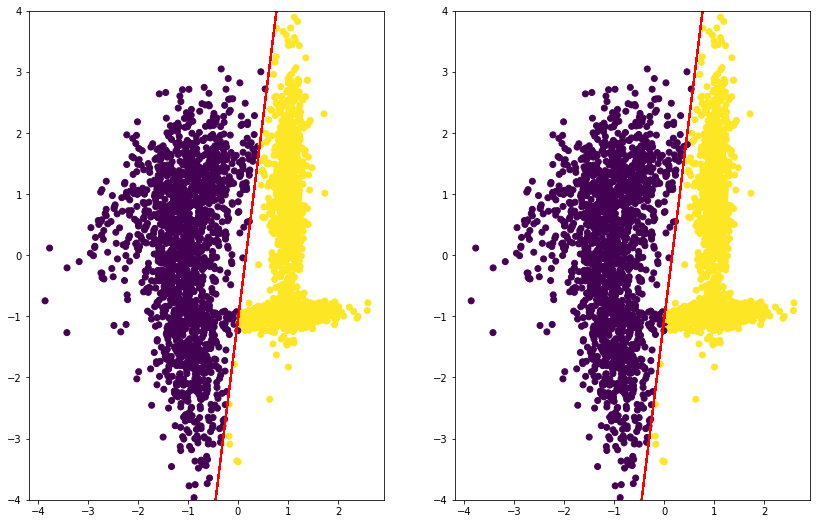

In [114]:
NN_pred = NN_LR(X_test).round().detach().numpy()
fig = plt.figure(figsize =(14, 9))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# ax3 = fig.add_subplot(122)

ax1.scatter(X_test[:,0], X_test[:,1], c = pred)
ax2.scatter(X_test[:,0], X_test[:,1], c = NN_pred)
ax1.plot(X_test[:,0],decision_boundary, c = 'red')
ax2.plot(X_test[:,0],decision_boundary, c = 'red')
ax1.set_ylim(-4, 4)
ax2.set_ylim(-4, 4)